# Team 2 - Google Play Store

![](https://www.brandnol.com/wp-content/uploads/2019/04/Google-Play-Store-Search.jpg)

_For more information about the dataset, read [here](https://www.kaggle.com/lava18/google-play-store-apps)._

## Your tasks
- Name your team!
- Read the source and do some quick research to understand more about the dataset and its topic
- Clean the data
- Perform Exploratory Data Analysis on the dataset
- Analyze the data more deeply and extract insights
- Visualize your analysis on Google Data Studio
- Present your works in front of the class and guests next Monday

## Submission Guide
- Create a Github repository for your project
- Upload the dataset (.csv file) and the Jupyter Notebook to your Github repository. In the Jupyter Notebook, **include the link to your Google Data Studio report**.
- Submit your works through this [Google Form](https://forms.gle/oxtXpGfS8JapVj3V8).

## Tips for Data Cleaning, Manipulation & Visualization
- Here are some of our tips for Data Cleaning, Manipulation & Visualization. [Click here](https://hackmd.io/cBNV7E6TT2WMliQC-GTw1A)

_____________________________

## Some Hints for This Dataset:
- There are lots of null values. How should we handle them?
- Column `Installs` and `Size` have some strange values. Can you identify them?
- Values in `Size` column are currently in different format: `M`, `k`. And how about the value `Varies with device`?
- `Price` column is not in the right data type
- And more...


In [1]:
# Start your codes here!
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
data = pd.read_csv('google-play-store.csv')
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [3]:
data.shape

(10841, 13)

# Cleaning data

In [4]:
data['Size']

0                       19M
1                       14M
2                      8.7M
3                       25M
4                      2.8M
                ...        
10836                   53M
10837                  3.6M
10838                  9.5M
10839    Varies with device
10840                   19M
Name: Size, Length: 10841, dtype: object

In [3]:
data['Size'] = data['Size'].map(lambda x: x.rstrip('M'))
data['Size'] = data['Size'].map(lambda x: str(round(float(x.rstrip('k'))/1024, 1)) if x[-1] == 'k' else x)
data['Size'] = data['Size'].replace('Varies with device', np.nan)


In [4]:
data['Installs'] = data['Installs'].map(lambda x: x.rstrip('+'))
data['Installs'] = data['Installs'].map(lambda x: ''.join(x.split(',')))

In [7]:
data['Installs']

0           10000
1          500000
2         5000000
3        50000000
4          100000
           ...   
10836        5000
10837         100
10838        1000
10839        1000
10840    10000000
Name: Installs, Length: 10841, dtype: object

In [8]:
data['Price'].value_counts()

0         10040
$0.99       148
$2.99       129
$1.99        73
$4.99        72
          ...  
$37.99        1
$3.88         1
$2.56         1
$4.59         1
$1.59         1
Name: Price, Length: 93, dtype: int64

In [5]:
data['Price'] = data['Price'].map(lambda x: x.lstrip('$'))
data['Price'].value_counts()


0        10040
0.99       148
2.99       129
1.99        73
4.99        72
         ...  
5.00         1
19.40        1
4.29         1
4.60         1
1.50         1
Name: Price, Length: 93, dtype: int64

In [7]:
data['Price'] = data['Price'].replace('Everyone', np.nan)
data['Price'].value_counts()


0        10040
0.99       148
2.99       129
1.99        73
4.99        72
         ...  
30.99        1
5.00         1
74.99        1
2.95         1
25.99        1
Name: Price, Length: 92, dtype: int64

In [11]:
# check missing values
data.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                1
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [6]:
data['Rating'].fillna(data['Rating'].median(), inplace = True)

In [11]:
data.isnull().sum()

App                  0
Category             0
Rating               0
Reviews              0
Size              1695
Installs             0
Type                 1
Price                1
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

# Distribution of features

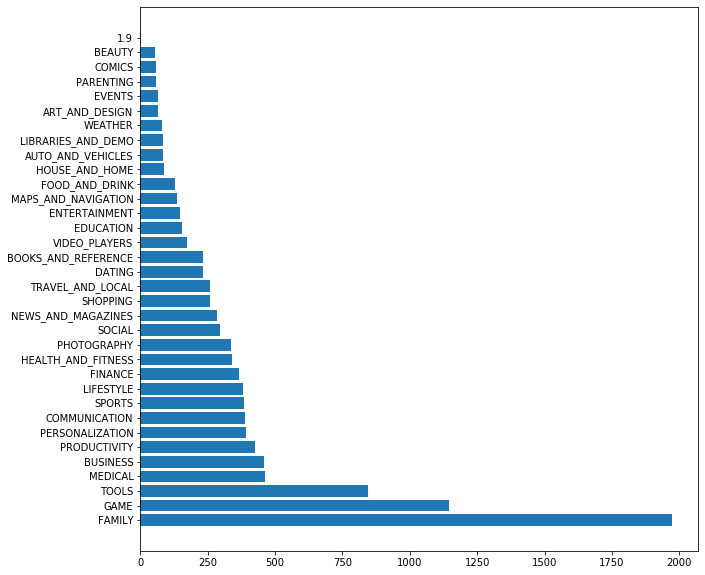

In [13]:
plt.figure(figsize = (10, 10))
index = np.arange(0,34)
plt.barh(index, data['Category'].value_counts())
plt.yticks(index, data['Category'].value_counts().index)
plt.show()

In [19]:
data['Category'].value_counts()

FAMILY                 1972
GAME                   1144
TOOLS                   843
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         392
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               382
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             335
SOCIAL                  295
NEWS_AND_MAGAZINES      283
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     231
VIDEO_PLAYERS           175
EDUCATION               156
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          127
HOUSE_AND_HOME           88
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       85
WEATHER                  82
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
1.9                       1
Name: Category, dtype: int64

In [3]:
data['Content Rating'].value_counts()

Everyone           8714
Teen               1208
Mature 17+          499
Everyone 10+        414
Adults only 18+       3
Unrated               2
Name: Content Rating, dtype: int64

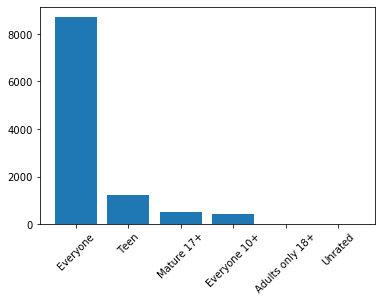

In [8]:
index = np.arange(0, 6)
plt.bar(index, data['Content Rating'].value_counts())
plt.xticks(index, data['Content Rating'].value_counts().index, rotation = 45)
plt.show()

In [7]:
cat_list = list(data.Category.unique())
cat_list

['ART_AND_DESIGN',
 'AUTO_AND_VEHICLES',
 'BEAUTY',
 'BOOKS_AND_REFERENCE',
 'BUSINESS',
 'COMICS',
 'COMMUNICATION',
 'DATING',
 'EDUCATION',
 'ENTERTAINMENT',
 'EVENTS',
 'FINANCE',
 'FOOD_AND_DRINK',
 'HEALTH_AND_FITNESS',
 'HOUSE_AND_HOME',
 'LIBRARIES_AND_DEMO',
 'LIFESTYLE',
 'GAME',
 'FAMILY',
 'MEDICAL',
 'SOCIAL',
 'SHOPPING',
 'PHOTOGRAPHY',
 'SPORTS',
 'TRAVEL_AND_LOCAL',
 'TOOLS',
 'PERSONALIZATION',
 'PRODUCTIVITY',
 'PARENTING',
 'WEATHER',
 'VIDEO_PLAYERS',
 'NEWS_AND_MAGAZINES',
 'MAPS_AND_NAVIGATION',
 '1.9']

In [8]:
everyone = []
teen = []
everyone_10 = []
mature_17 = []
adults_only_18 = []
unrated = []

In [9]:
data['Content Rating'].value_counts()

Everyone           8714
Teen               1208
Mature 17+          499
Everyone 10+        414
Adults only 18+       3
Unrated               2
Name: Content Rating, dtype: int64

In [10]:
def count_component(everyone, teen, everyone_10, mature_17, adults_only_18, unrated, temp):
    try:
        everyone.append(temp.groupby('Content Rating').size()['Everyone'])
    except:
        everyone.append(0)
    try:
        teen.append(temp.groupby('Content Rating').size()['Teen'])
    except:
        teen.append(0)
    try:
        everyone_10.append(temp.groupby('Content Rating').size()['Everyone 10+'])
    except:
        everyone_10.append(0)
    try:
        mature_17.append(temp.groupby('Content Rating').size()['Mature 17+'])
    except:
        mature_17.append(0)
    try: 
        adults_only_18.append(temp.groupby('Content Rating').size()['Adults only 18+'])
    except:
        adults_only_18.append(0)
    try: 
        unrated.append(temp.groupby('Content Rating').size()['Unrated'])
    except:
        unrated.append(0)
for cat in cat_list:
    temp = data[data['Category'] == cat]
    count_component(everyone, teen, everyone_10, mature_17, adults_only_18, unrated, temp)  

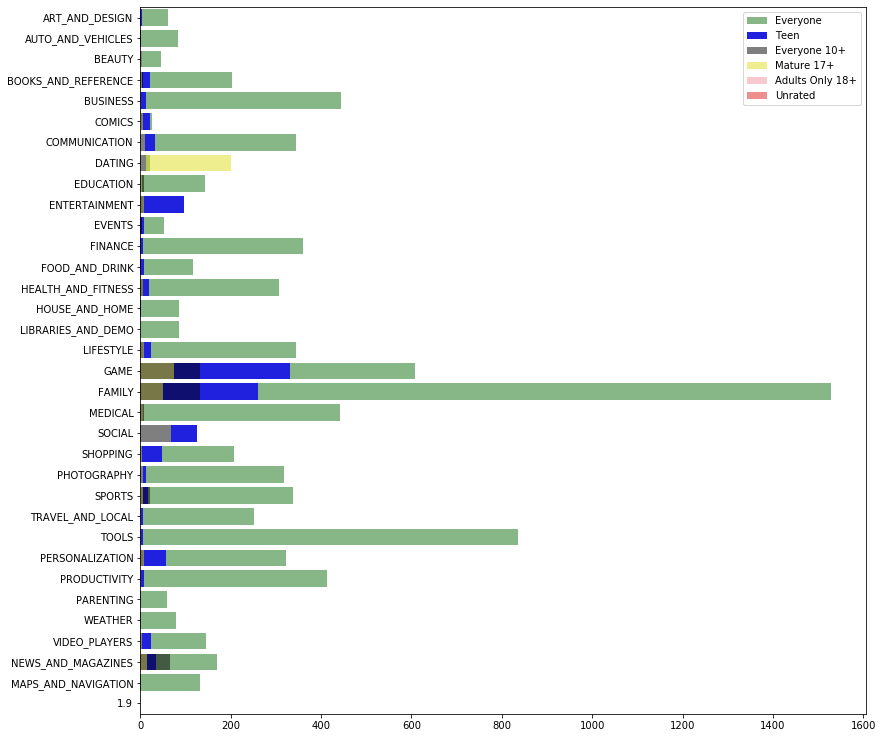

In [11]:
f, ax = plt.subplots(figsize = (13, 13))
sns.barplot(x = everyone, y = cat_list, color = 'green', alpha = 0.5, label = 'Everyone')
sns.barplot(x = teen, y = cat_list, color = 'blue', label = 'Teen')
sns.barplot(x = everyone_10, y = cat_list, color = 'black', alpha = 0.5, label = 'Everyone 10+')
sns.barplot(x = mature_17, y = cat_list, color = 'yellow', alpha = 0.5, label = 'Mature 17+')
sns.barplot(x = adults_only_18, y = cat_list, color = 'pink', label = 'Adults Only 18+')
sns.barplot(x = unrated, y = cat_list, color = 'red', alpha = 0.5, label = 'Unrated')

ax.legend()
plt.show()

In [12]:
# Rating
ratings = []

for cat in cat_list:
    temp = data[data['Category'] == cat]
    rating_ave = temp['Rating'].sum()/len(temp)
    ratings.append(rating_ave)
category_rating = pd.DataFrame({'Category':cat_list, 'Rating':ratings})
category_rating
    

,Category,Rating
0,ART_AND_DESIGN,4.355385
1,AUTO_AND_VEHICLES,4.205882
2,BEAUTY,4.283019
3,BOOKS_AND_REFERENCE,4.335498
4,BUSINESS,4.182391
5,COMICS,4.160000
6,COMMUNICATION,4.180103
7,DATING,4.025641
8,EDUCATION,4.388462
9,ENTERTAINMENT,4.126174


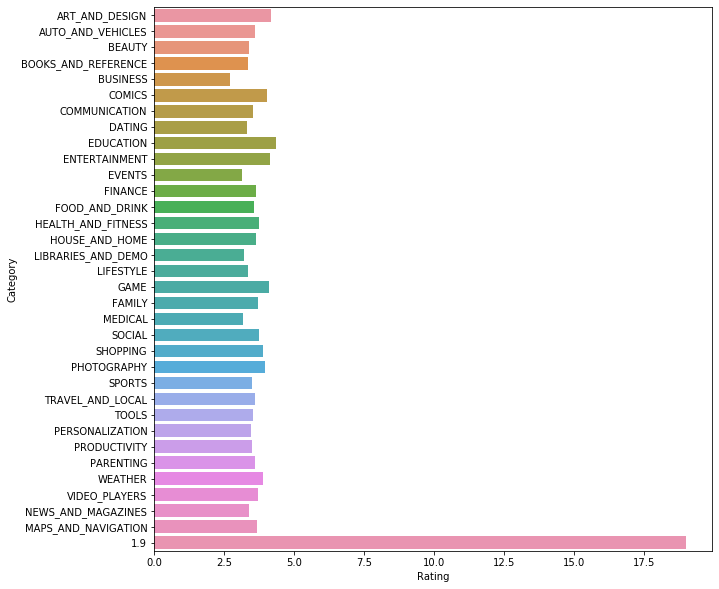

In [17]:
plt.figure(figsize = (10, 10))
sns.barplot(y = category_rating['Category'], x = category_rating['Rating'])
#plt.xticks(rotation = 90)
plt.show()

In [18]:
data[data['Category'] ==  '1.9']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,NaN,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [13]:
data.drop(labels = 10472, inplace = True)

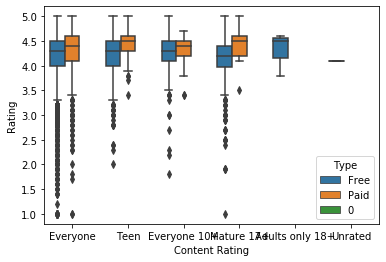

In [5]:
#Boxplot
sns.boxplot(data = data, x = 'Content Rating', y = 'Rating', hue = 'Type')

In [13]:
#Rating- Version
data['Android Ver'].value_counts()

4.1 and up            2451
4.0.3 and up          1501
4.0 and up            1375
Varies with device    1362
4.4 and up             980
2.3 and up             652
5.0 and up             601
4.2 and up             394
2.3.3 and up           281
2.2 and up             244
4.3 and up             243
3.0 and up             241
2.1 and up             134
1.6 and up             116
6.0 and up              60
7.0 and up              42
3.2 and up              36
2.0 and up              32
5.1 and up              24
1.5 and up              20
4.4W and up             12
3.1 and up              10
2.0.1 and up             7
8.0 and up               6
7.1 and up               3
5.0 - 8.0                2
4.0.3 - 7.1.1            2
1.0 and up               2
7.0 - 7.1.1              1
4.1 - 7.1.1              1
5.0 - 6.0                1
2.2 - 7.1.1              1
5.0 - 7.1.1              1
Name: Android Ver, dtype: int64

In [14]:
data['Android Ver'].isnull().sum()
data['Android Ver'].fillna('4.1 and up', inplace = True)

In [15]:
data['Android Ver'][data['Android Ver'] == 'Varies with device'] = '4.1 and up'
data['Android_ver_int'] = data['Android Ver'].str[0:1].astype(int)
data['Android_ver_int'].value_counts()


<ipython-input-15-7ea4bd746e69>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Android Ver'][data['Android Ver'] == 'Varies with device'] = '4.1 and up'


4    8323
2    1351
5     629
3     287
1     138
6      60
7      46
8       6
Name: Android_ver_int, dtype: int64

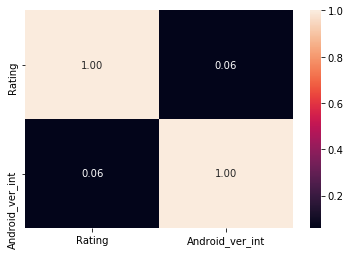

In [25]:
sns.heatmap(data.corr(), annot = True, fmt = '.2f')

In [17]:
data.to_csv('out.csv')

In [16]:
data.shape

(10840, 14)

In [21]:
df=pd.read_csv('out.csv')
df.shape

(10840, 14)